# _________Lead scoring case study___________________________________

## Plan of Action

1. **Import the Required Libraries**
2. **EDA (Exploratory Data Analysis):**
   - **Import the Data:** 
   - **Read and Understand the Data:**
     - **Check the Shape of the Data:**
     - **Use `info()` to Get Information:** 
     - **Use `describe()` for Descriptive Statistics:** 
3. **Data Cleaning:**
   - **Handle Null Values:** 
   - **Normalize the Data:** 
4. **Data Visualization:**
   - **Bivariate Analysis:**
     - **Categorical vs. Categorical Variables:**
     - **Categorical vs. Numerical Variables:**
   - **Multivariate Analysis:**
     - **Heat Map for Correlation Matrix:**
5. **Data Preparation:**
   - **Create Dummy Variables:**
   - **Split Data into Train and Test Sets:**
   - **Scale the Data:**
6. **Model Building:**
   - **Apply Logistic Regression:**
7. **VIF and RFE:**
   - **Drop Variables for High VIF and P-value:**
   - **Iteratively Improve Model:**
8. **Confusion Matrix and Accuracy:**
   - **Confusion Matrix and Accuracy:**
9. **Model Evaluation Using Test Set:**
    - **Appropriate Evaluation Metrics:** 

### 1. **Import the Required Libraries**

In [1]:
#importing libraries for analysis.
import numpy as np
import pandas as pd
#importing libraries for filtering warnings out.
import warnings
warnings.filterwarnings('ignore')
#importing libraries fro visualization.
import seaborn as sns
import matplotlib.pyplot as plt
#importing libraries for statistical analysis
from scipy import stats
import statsmodels.api as sm
#importing libraries for statistical modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#importing libraries for regression and RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
#importing libraries for evaluation and 
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,auc,roc_curve,roc_auc_score,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

##   ________2. EDA_____________________________________________________________

- **Import the Data:** 

In [2]:
#loading the required data.
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


 ### - **Understand the Data:**
- **Use `info()` to Get Information:** 

In [3]:
#checking information of the data frame to know the dtypes and columns with null values
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

By the above information we can see there are `30` object type variables, `7` numerical variables and out of 37 `17` columns contains null values.

**Check the Shape of the Data:**

In [4]:
#checking the shape of the dataframe.
lead.shape

(9240, 37)

- **Use `describe()` for Descriptive Statistics:** 

In [5]:
#checking the description of the data frame for better statistical understanding.
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Based on the statistical description of the data frame, it can be concluded that there are no outliers present.

## __________3. Data Cleaning:__________________________________________________________

- **Handle Null Values:** 

In [6]:
# finding the null value percentage of all collumns in a decreasing order
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

We have computed the percentage of null values in each column and organized them in descending order. In the next step, we are addressing the null values by considering columns with null percentages greater than or equal to `30%`, and we are removing the columns that do not meet this criterion.

In [7]:
#dropping the collumns with nore than 30% of null values.
for x in lead.columns:
    if round(100*(lead[x].isnull().sum()/len(lead.index)),2) >= 30.00:
        lead.drop(x, axis=1 , inplace=True)

In [8]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [9]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

More than 40% of the entries in the "City" column are marked as 'Select', indicating that a significant portion of students have not made a selection for the city.

In [10]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

The "Country" column is dominated by the value "India," which is chosen by over 90% of the students. Therefore, this column may not provide meaningful insights for analysis.

In [11]:
#dropping city and country as they dont contribute for analysis.
lead.drop(['City', 'Country'], axis=1 , inplace=True)

In [12]:
lead.shape

(9240, 29)

In [13]:
for i in lead:
    print(lead[i].astype('category').value_counts())
    print('**************************************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
**************************************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
**************************************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: in

Upon examining the counts of unique values, it is evident that certain columns should be dropped due to their skewed data distribution.

In [14]:
lead.drop(['Through Recommendations','Receive More Updates About Our Courses','Get updates on DM Content','Lead Profile','Update me on Supply Chain Content','I agree to pay the amount through cheque','How did you hear about X Education','What matters most to you in choosing a course','Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'], axis=1, inplace=True)

In [15]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)

What is your current occupation           29.11
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

- **Based on the provided information, we conclude that the null value percentages are within permissible limits to consider dropping records.**

In [16]:
# List of columns with missing values to consider
columns_with_missing = ['What is your current occupation', 'Specialization', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']
# Iterate through the columns and drop records with missing values
for column in columns_with_missing:
    lead = lead.dropna(subset=[column])
# Explanation: Dropping records (rows) with missing values in specific columns
# to ensure data quality and consistency for subsequent analysis.

In [17]:
#checking the null values after all cleaning process
#this pertricluar code will chcek for the null vales and stores the columns with null percentage in the form of dictionary
nullcheck=[k for (k,v) in (lead.isnull().mean().to_dict()).items() if v>0]
nullcheck

[]

With the data now cleared of null values, we can proceed to the next steps.

In [18]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [19]:
lead.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

We will drop the columns 'Prospect ID' and 'Lead Number' since they serve as reference IDs and are unique, thus not contributing significantly to the analysis.

In [20]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [21]:
#containerizing the columns according to their data types
numcol=[]
objcol=[]
for i in lead.columns:
    if lead.dtypes[i]==np.object:
        objcol.append(i)
    else:
        numcol.append(i)

In [22]:
numcol

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

### ___________4. **Data Visualization:**____________________________________________________

**Bivariate Analysis**

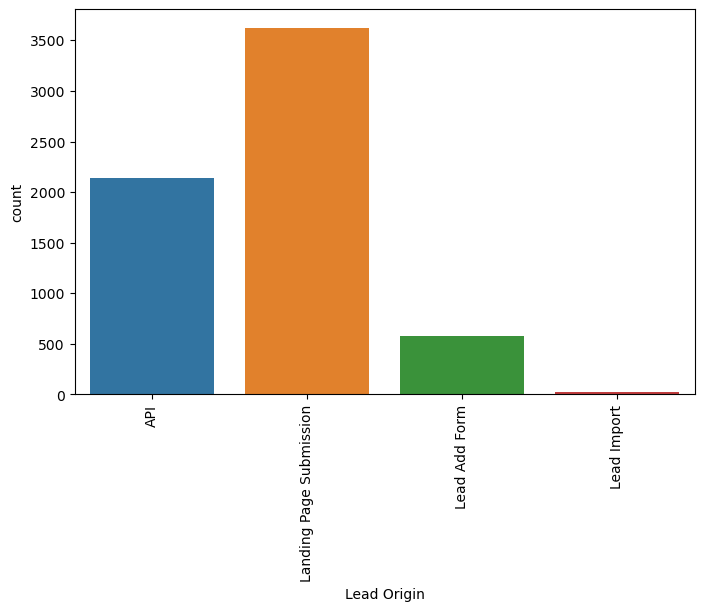

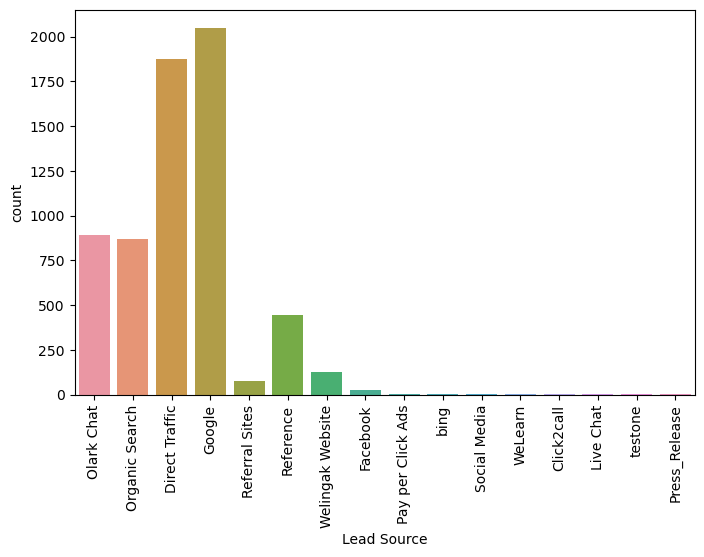

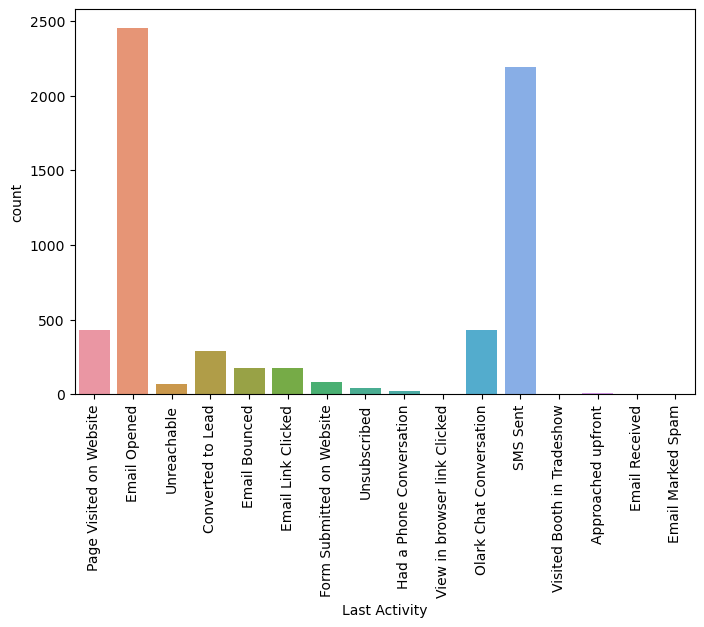

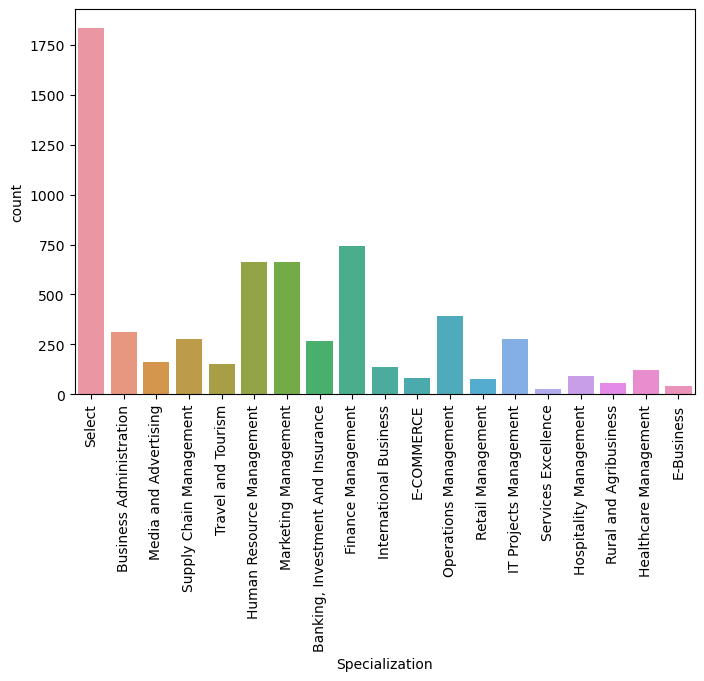

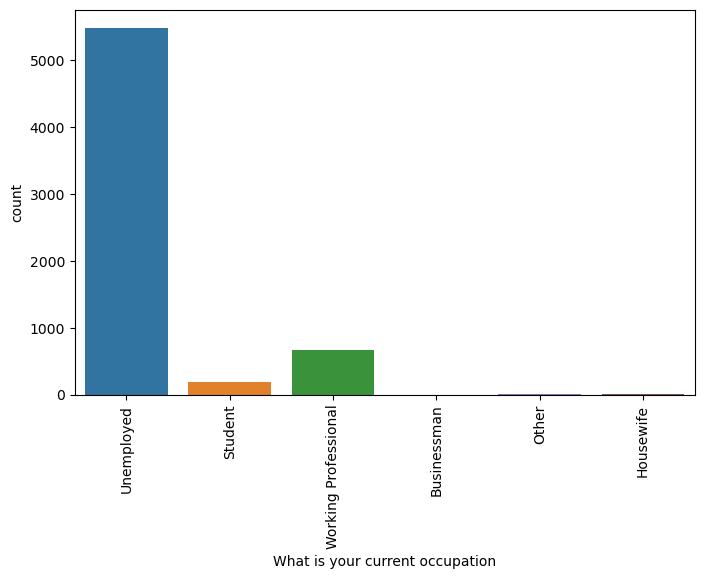

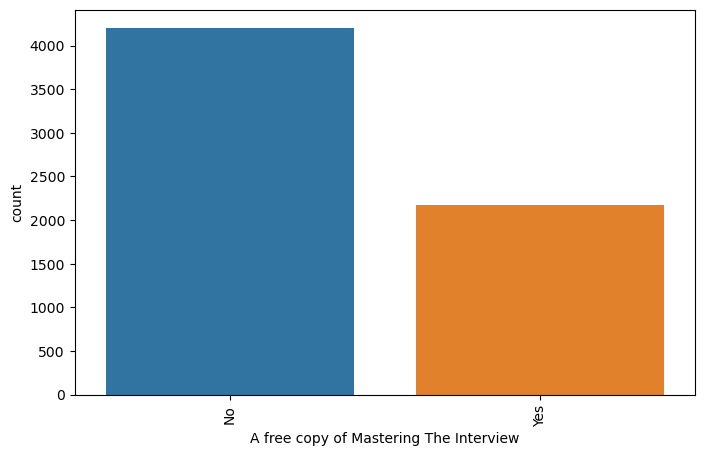

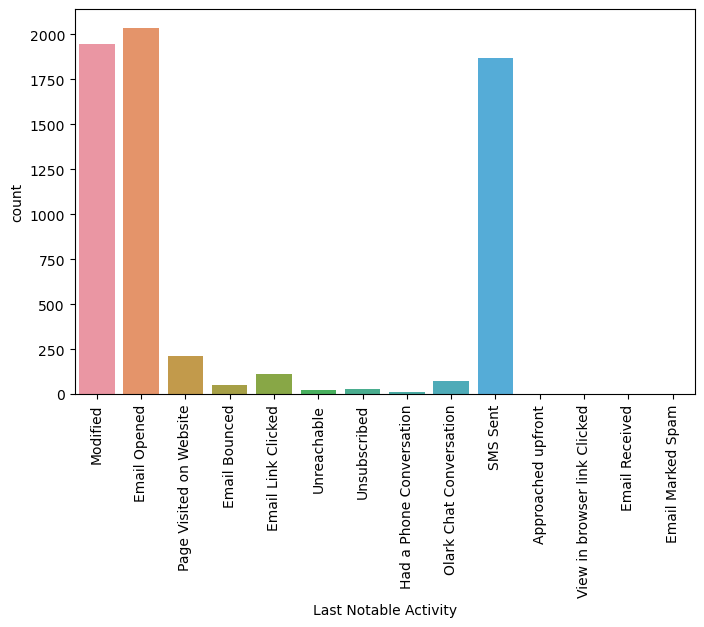

In [23]:
#visulaizing all object columns using count plot
for i in objcol:
    plt.figure(figsize=(8,5))
    sns.countplot(lead[i])
    plt.xticks(rotation=90)
    plt.show

**numericals vs numericals**

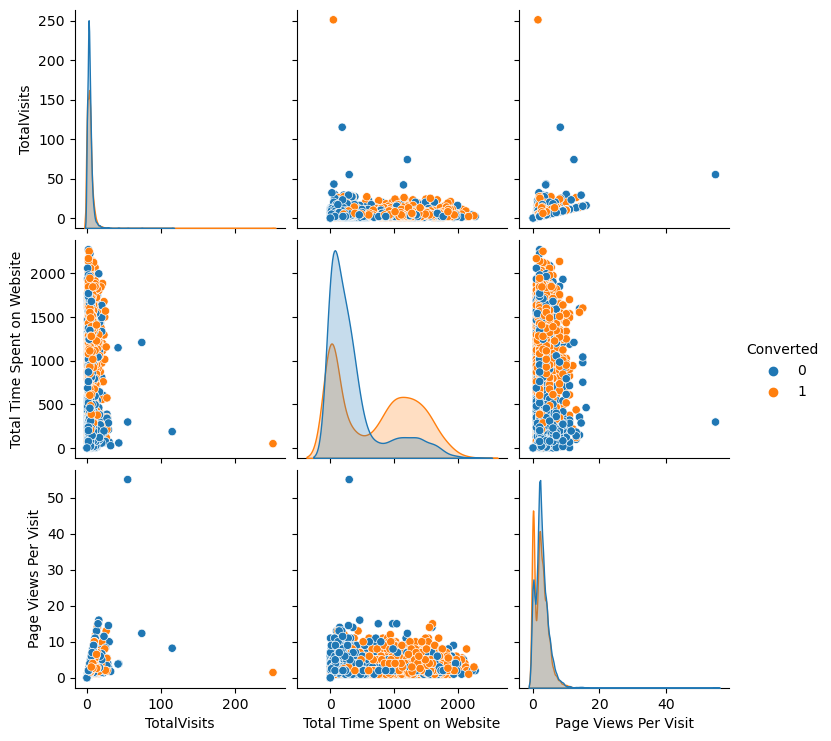

In [24]:
# Set up a pair plot with Kernel Density Estimation (KDE) plots on the diagonal
# The 'hue' parameter adds color differentiation based on the 'Converted' column
sns.pairplot(lead, diag_kind='kde', hue='Converted')
plt.show()

**Categorical vs Numerical Variables:**

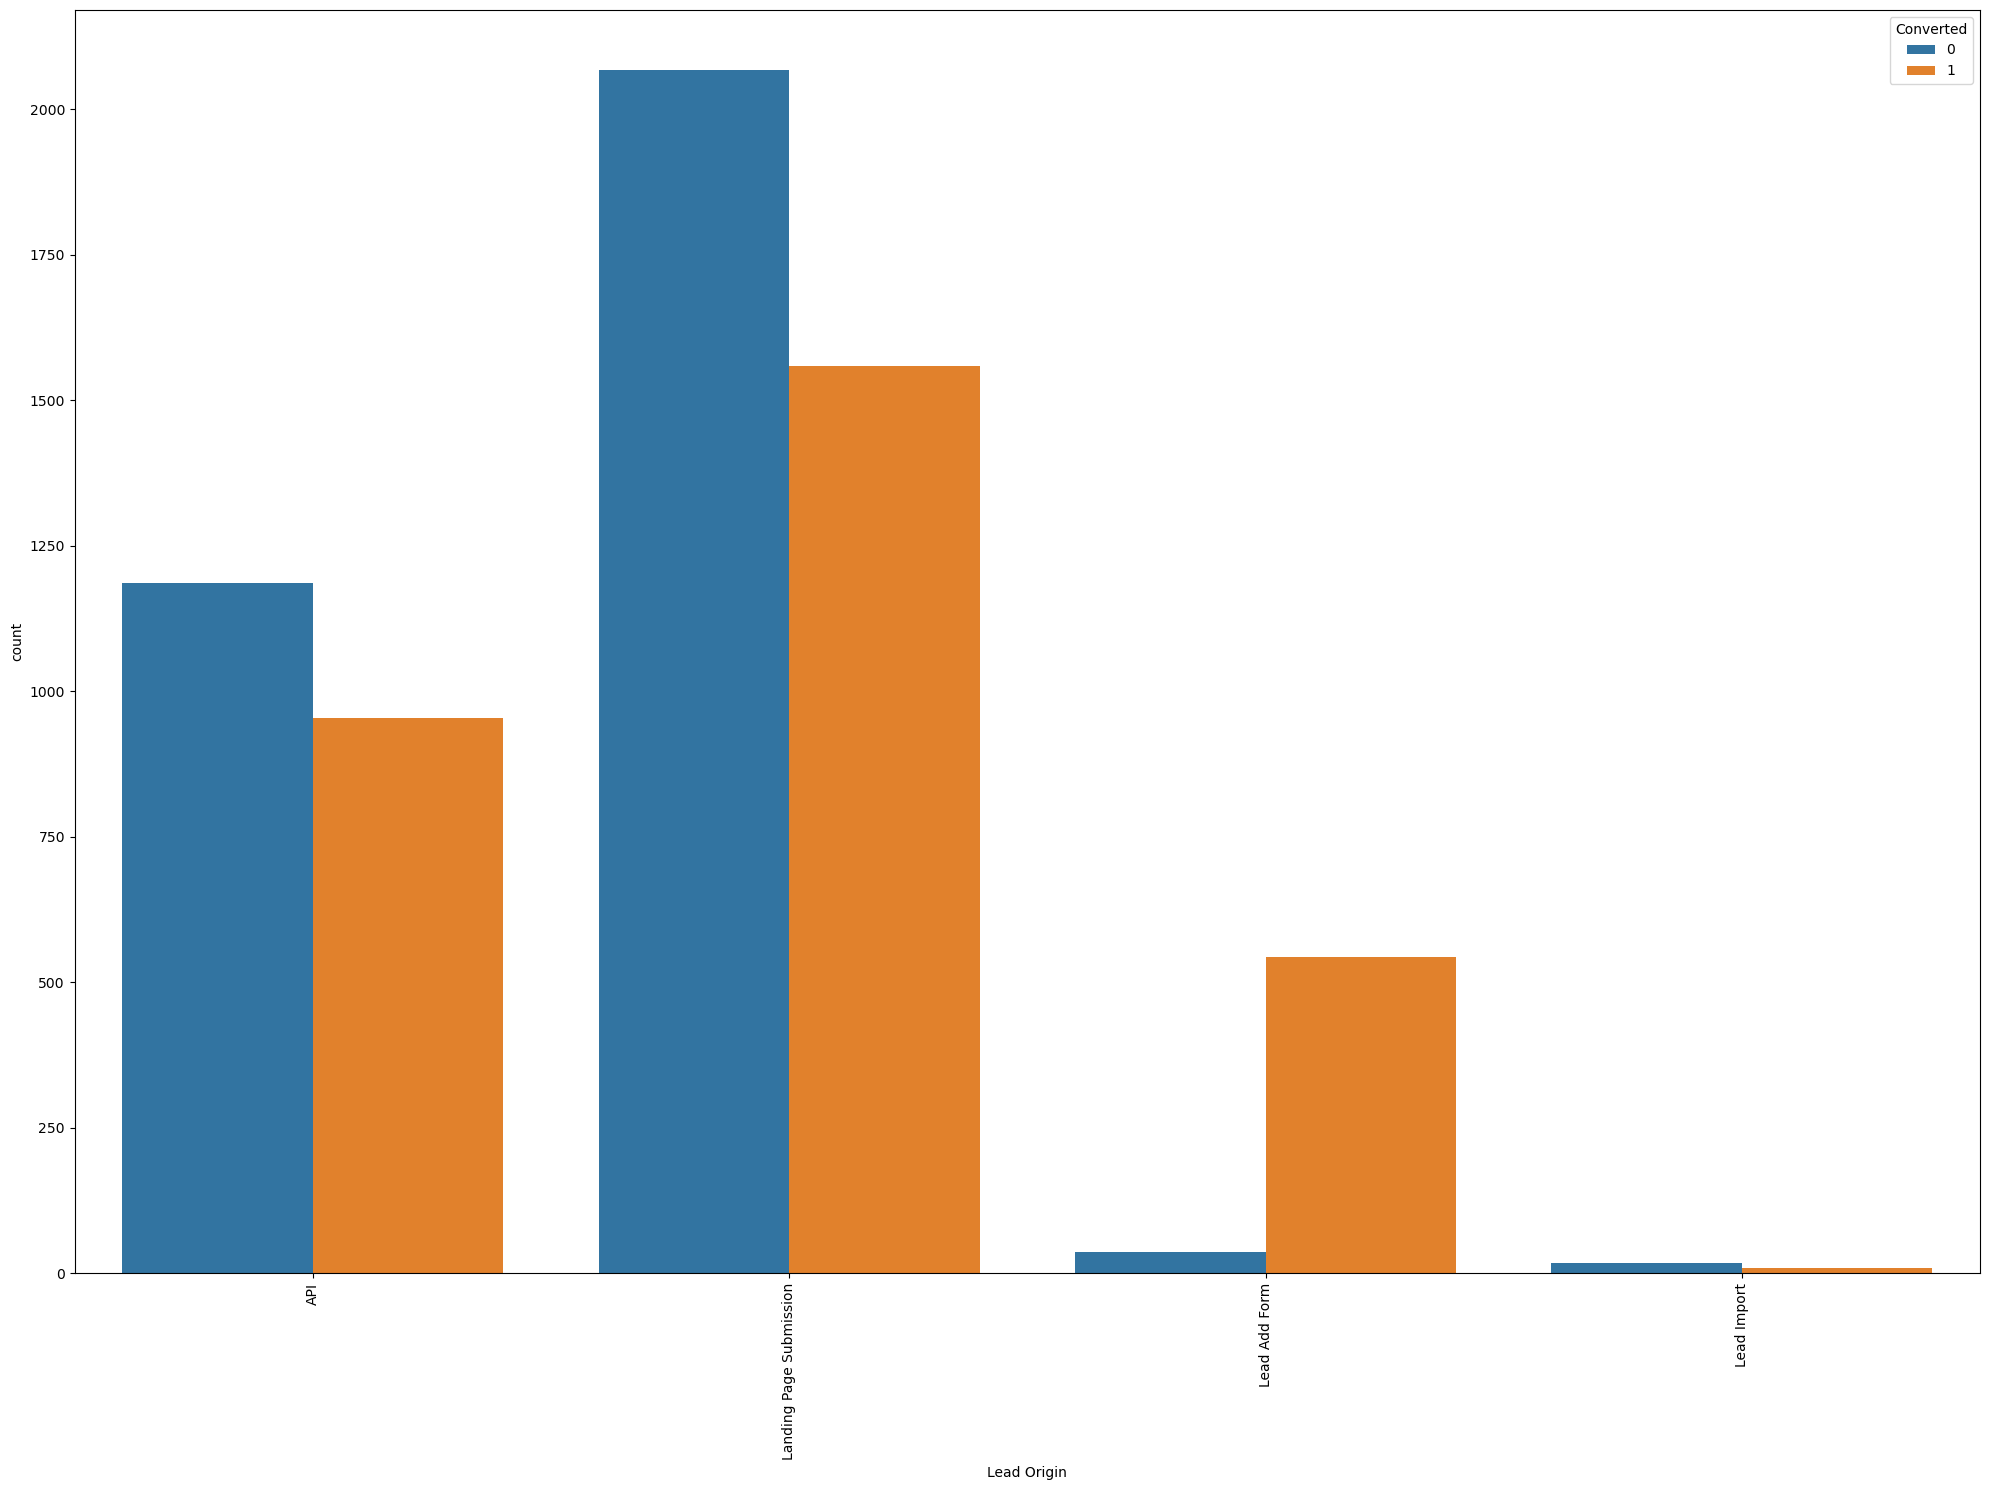

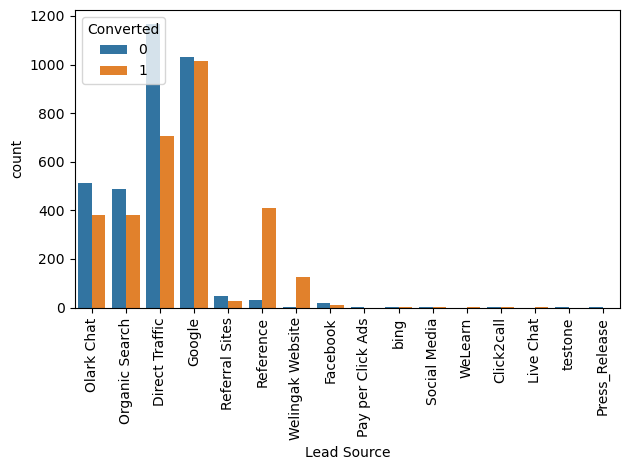

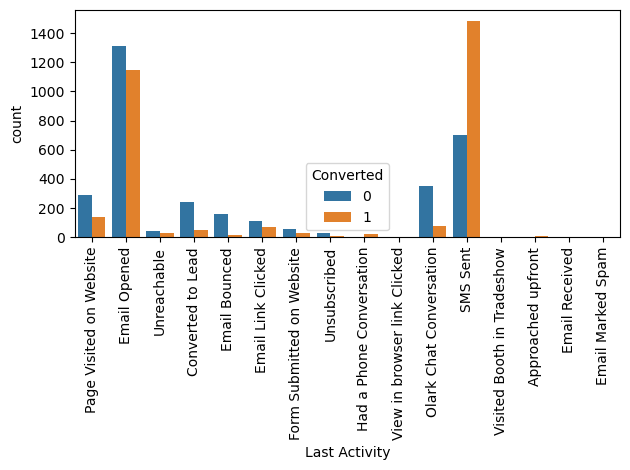

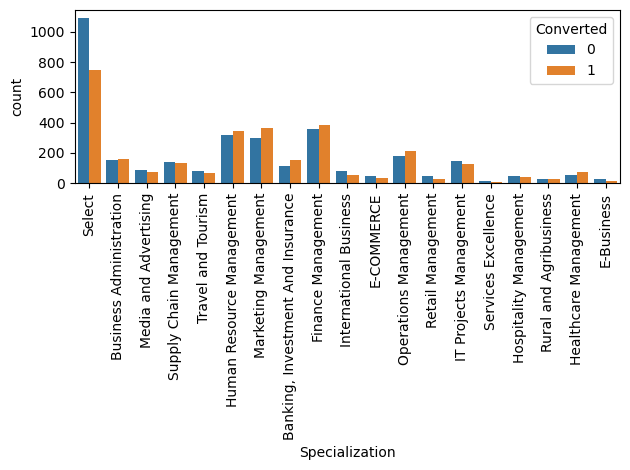

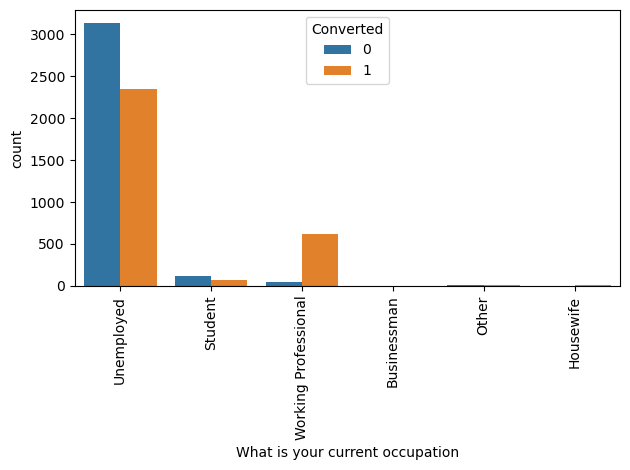

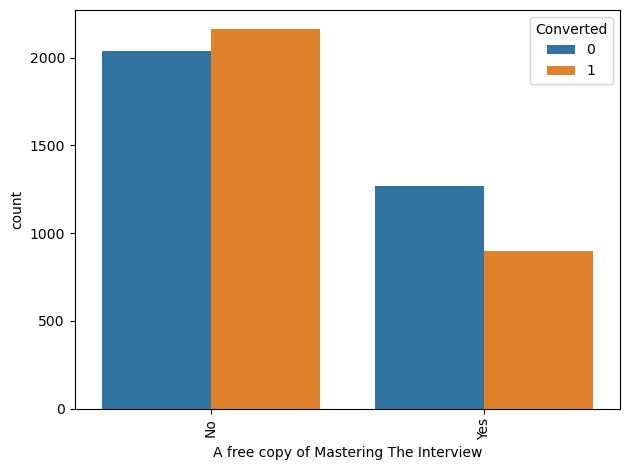

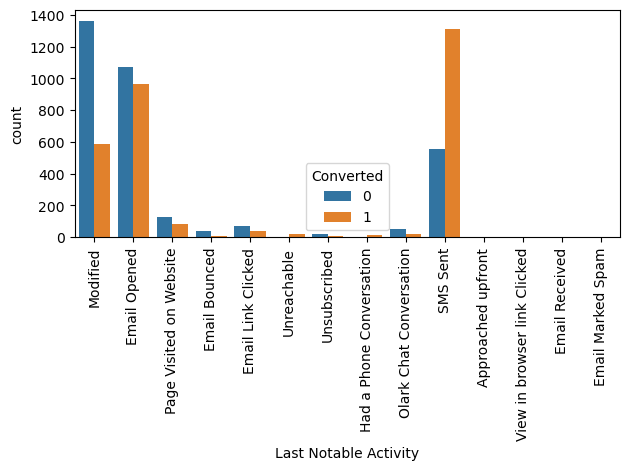

In [25]:
# Set up a larger figure for displaying multiple count plots
plt.figure(figsize=(20, 15))
# Iterate through categorical columns
for i in objcol:
    # Create a count plot with hue based on 'Converted' column
    sns.countplot(x=i, hue="Converted", data=lead)
    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=90)
    # Calculate the highest count for the current categorical column
    highest_value = lead[i].value_counts().max()
    # Add annotation for the highest value
    plt.annotate(f'Highest Value: {highest_value}', xy=(0.5, highest_value),
                 xytext=(0.5, highest_value + 10), textcoords='offset points',
                 ha='center', fontsize=12, color='red')
    # Ensure plots are well laid out
    plt.tight_layout()
    # Display the plot
    plt.show()
# Explanation: Looping through categorical columns, creating count plots with 'Converted'
# shown by hue. Rotating x-axis labels for readability. Calculating and annotating the highest value.
# in the plot. Ensuring plots are well laid out and displaying them.

**Analyzing the columns:**

- For the 'Lead Origin' column, the highest source of leads is from `'Landing Page Submission'`, but the conversion rate is higher for `'Lead Add Form'`.
- In the 'Lead Source' column, `'Google'` attracted the most leads, but `'Reference'` had a higher conversion rate.
- When looking at the 'Last Activity' column, `'Email Opened'` is the most common activity, yet the highest conversion rate is observed for `'SMS Sent'`.
- In the 'Specialization' column, most people did not select any specialization. Among those who did, `'Marketing Management'` showed the highest conversion rate.
- Regarding the 'What is your current occupation' column, the majority of approaching leads are `'Unemployed'`, but the highest conversion rate is seen among `'Working Professionals'`.
- For the 'Last Notable Activity' column, `'Email Opened'` is the most common activity, yet the highest conversion rate is observed for `'SMS Sent'`.

This indicates that certain attributes may have a stronger impact on the likelihood of conversion even though they might not be the most common among the leads.

**MULTIVARIATE ANALYSIS**

In [26]:
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.005651,0.313338,-0.063362
TotalVisits,0.005651,1.000000,0.202551,0.489039
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000


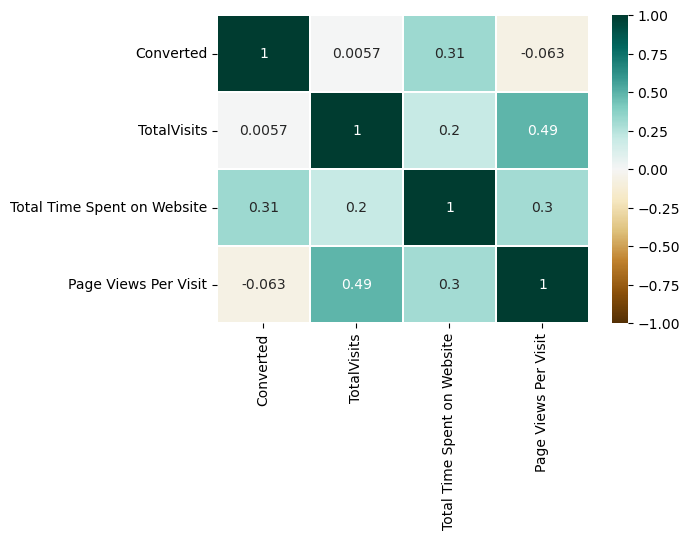

In [27]:
plt.figure(figsize=(6,4))
# heatmap
sns.heatmap(lead.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

**Based on the observations:**

- The attribute `'Page Views Per Visit'` and `'Converted'` exhibit the highest negative correlation of `-0.063`.

- There is a strong positive correlation of `0.49` between `'TotalVisits'` and `'Page Views Per Visit'`.

- The correlation between `'Total Time Spent on Website'` and `'Converted'` is `0.31`, indicating a moderate positive relationship.

## ___________________________5. **Data Preparation:**_____________________________________________
   - **Create Dummy Variables:**

In [28]:
# Encoding categorical variables using one-hot encoding
# Get one-hot encoded columns for specific categorical features
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']])
# Concatenate the one-hot encoded columns to the original DataFrame
lead = pd.concat([lead, dummy], axis=1)
# Get one-hot encoded columns for the 'Specialization' feature
dummy = pd.get_dummies(lead[['Specialization']])
# Drop the 'Specialization_Select' column as a reference category
dummy = dummy.drop(['Specialization_Select'], 1)
# Concatenate the one-hot encoded 'Specialization' columns to the DataFrame
lead = pd.concat([lead, dummy], axis=1)

In [29]:
lead.shape

(6373, 87)

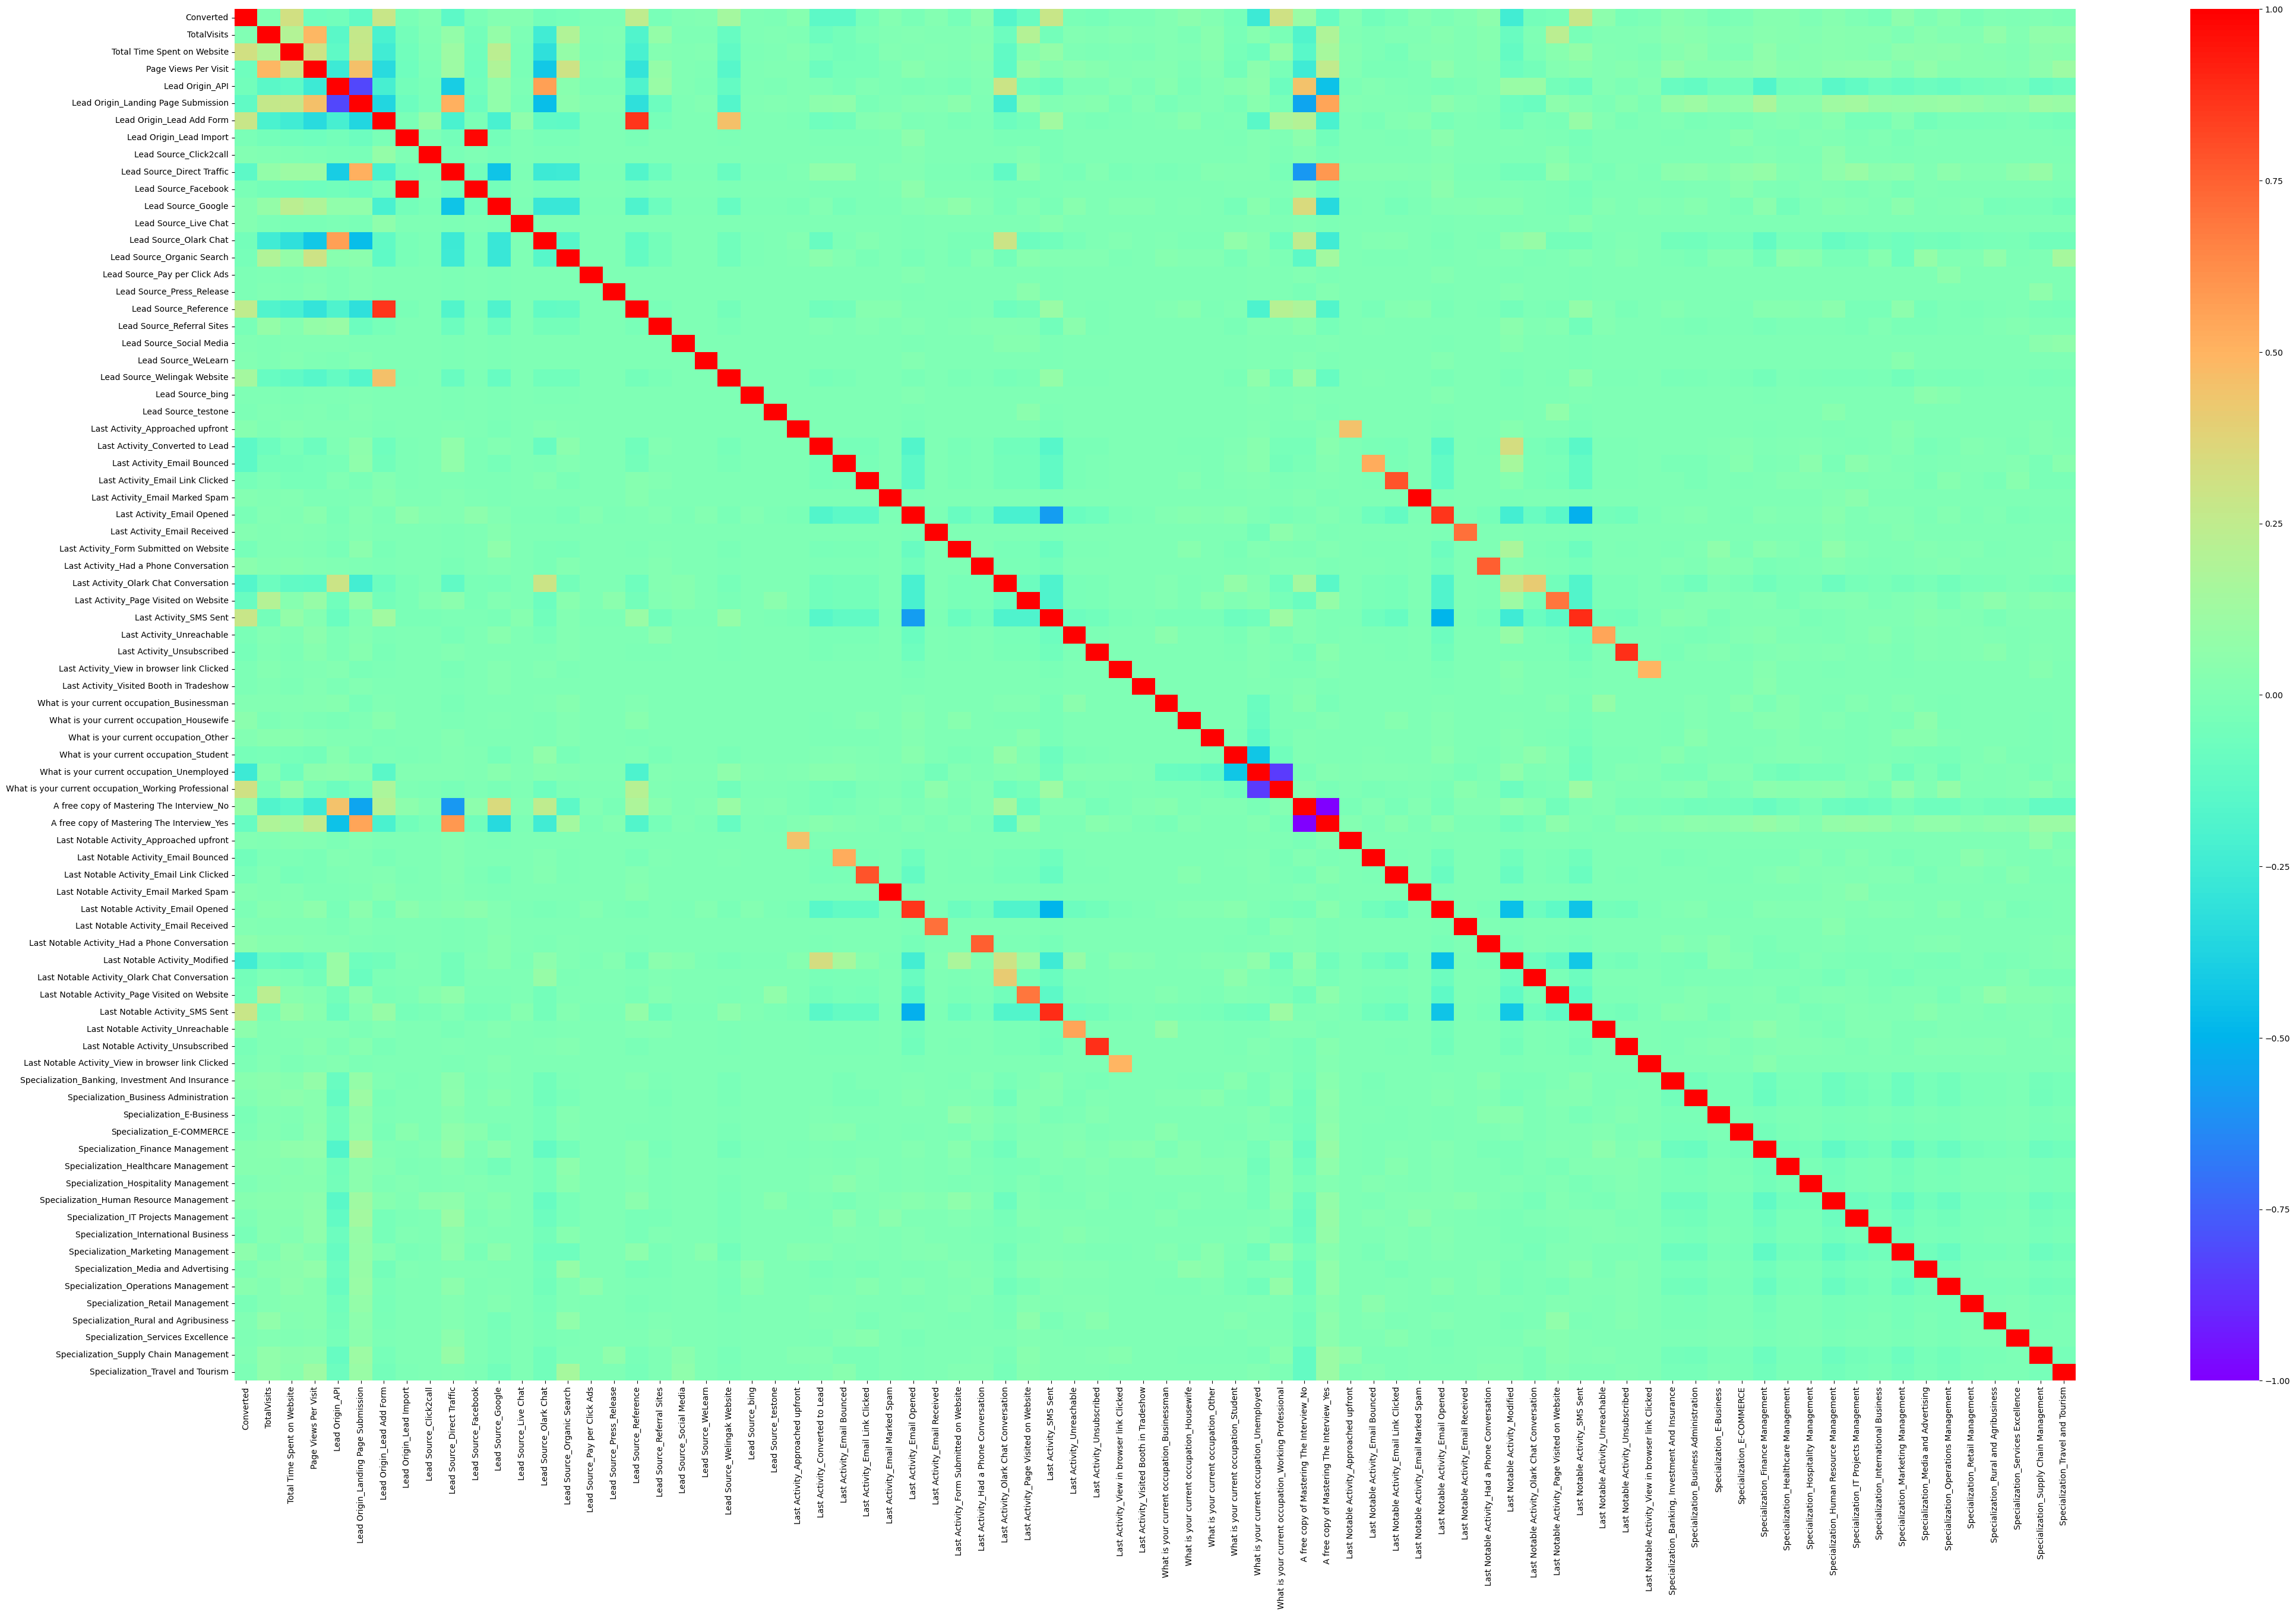

In [30]:
# Looking at the correlation table
plt.figure(figsize = (50,30))
sns.heatmap(lead.corr(), cmap='rainbow')
plt.show()

To simplify the analysis, let's identify highly correlated values using a threshold approach instead of relying on the complex heatmap.

In [31]:
from sklearn.feature_selection import VarianceThreshold
# Calculate correlation matrix
correlation_matrix = lead.corr()
# Set a threshold for correlation
correlation_threshold = 0.8  # Adjust the threshold as needed
# Find highly correlated features
highly_correlated = set()  # A set to store correlated feature pairs
# Iterate through each column in correlation matrix
for col in correlation_matrix.columns:
    # Find correlated columns with correlation above the threshold
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold]
    correlated_cols = set(correlated_cols) - {col}  # Exclude the column itself
    # Add correlated columns to the set
    highly_correlated.update([(col, corr_col) for corr_col in correlated_cols])
# Convert the set of correlated pairs to a list
highly_correlated_list = list(highly_correlated)
print("Highly Correlated Variable Pairs:")
for pair in highly_correlated_list:
    print(pair)
# You can then drop the highly correlated columns from the DataFrame
data_uncorrelated = lead.drop(columns=[col for pair in highly_correlated_list for col in pair])

Highly Correlated Variable Pairs:
('Last Notable Activity_Email Marked Spam', 'Last Activity_Email Marked Spam')
('Last Notable Activity_Unsubscribed', 'Last Activity_Unsubscribed')
('Last Activity_Email Opened', 'Last Notable Activity_Email Opened')
('Last Notable Activity_Email Opened', 'Last Activity_Email Opened')
('Last Activity_SMS Sent', 'Last Notable Activity_SMS Sent')
('Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent')
('Last Activity_Email Marked Spam', 'Last Notable Activity_Email Marked Spam')
('Last Activity_Unsubscribed', 'Last Notable Activity_Unsubscribed')
('Lead Source_Reference', 'Lead Origin_Lead Add Form')
('Lead Source_Facebook', 'Lead Origin_Lead Import')
('Lead Origin_Lead Add Form', 'Lead Source_Reference')
('Lead Origin_Lead Import', 'Lead Source_Facebook')


Lets make sure that these columns are not in the selected features after RFE.

In [32]:
# Dropping original categorical columns after one-hot encoding
# Drop the original categorical columns that were one-hot encoded
# 'Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
# 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Specialization'
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Specialization'], axis=1, inplace=True)

- **Split Data into Train and Test Sets:**

In [33]:
# Model building
# Extract features (independent variables) by dropping the 'Converted' column
x = lead.drop(['Converted'], axis=1)
# Extract the target variable 'Converted'
y = lead['Converted']
# Splitting the data into training and testing sets
# Use train_test_split to split the data into training and testing sets
# Set the train_size to 0.7 (70% of the data) and test_size to 0.3 (30% of the data)
# Use random_state for reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
x_train.shape

(4461, 79)

In [35]:
x_test.shape

(1912, 79)

- **Scale the Data:**

In [36]:
# Min-Max Scaling
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Apply Min-Max scaling to selected columns in the training data
# Fit the scaler on the specified columns and transform the data to a scaled version
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [37]:
x_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.0,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.014528,0.234426,0.153604,0.337592,0.564672,0.094149,0.003587,0.000224,0.290069,0.003587,0.320108,0.000448,0.139206,0.140776,0.000224,0.000224,0.071733,0.011208,0.0,0.000224,0.021296,0.000448,0.000224,0.000672,0.048644,0.027348,0.030038,0.0,0.387357,0.000224,0.012553,0.003811,0.062542,0.069491,0.338937,0.010536,0.006725,0.000897,0.000224,0.001121,0.001793,0.002690,0.028917,0.862139,0.103340,0.662632,0.337368,0.0,0.007397,0.019727,0.0,0.3

## ___________6. **Model Building:**____________________________________________________
   - **Apply Logistic Regression:**

In [38]:
# Logistic Regression and Recursive Feature Elimination (RFE)
# Create an instance of LogisticRegression
logreg = LogisticRegression()
# Create an instance of Recursive Feature Elimination (RFE)
# Set n_features_to_select to 15 to select 15 variables as output
rfe = RFE(logreg, n_features_to_select=20)
# Fit RFE on the training data
# RFE will evaluate and rank features based on their importance and select the top 15 features
rfe = rfe.fit(x_train, y_train)

## ____________________7. **VIF and RFE:**___________________________________________________________________________________
   - **RFE:**

In [39]:
# Listing the selected features using RFE
# Use the zip() function to combine column names, RFE support, and RFE ranking
feature_selection_results = list(zip(x_train.columns, rfe.support_, rfe.ranking_))
# Display the results
# The list contains tuples for each feature, where:
# - The first element is the column name
# - The second element is True if the feature is selected by RFE, otherwise False
# - The third element is the ranking of the feature based on its importance
feature_selection_results

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Source_Click2call', False, 4),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 26),
 ('Lead Source_testone', False, 34),
 ('Last Activity_Approached upfront', True, 1),
 ('Last Activity_Converted to Lead', Fa

In [40]:
# Putting all the columns selected by RFE in the variable 'selectedfeatures'
selectedfeatures = x_train.columns[rfe.support_]
selectedfeatures

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [41]:
# Creating a variable 'selectedfeatures' containing columns selected by RFE
# Use the 'rfe.support_' boolean mask to filter and select columns from x_train
selectedfeatures = x_train.columns[rfe.support_]
# Display the list of selected features
print(selectedfeatures)

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


In [42]:
x_train = x_train[selectedfeatures]
x_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

   - **Drop Variables for High VIF and P-value:**
   - **Iteratively Improve Model:**

### MODEL 1

In [43]:
# Fit a Logistic Regression model using statsmodels
# Add a constant to the selected features in X_train
X_train_sm = sm.add_constant(x_train[selectedfeatures])
# Create a Logistic Regression model using GLM (Generalized Linear Model)
# Use the Binomial family to model binary outcomes
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
# Fit the model to the training data
res = logm2.fit()
# Display the summary of the fitted model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.1
Date:                Tue, 15 Aug 2023   Deviance:                       4080.1
Time:                        15:43:37   Pearson chi2:                 4.71e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3752
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [44]:
# Checking Variance Inflation Factor (VIF) for multicollinearity
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,117.61
4,Lead Origin_Lead Add Form,97.00
3,Lead Origin_Landing Page Submission,79.34
6,Lead Source_Reference,65.21
2,Lead Origin_API,48.34
7,Lead Source_Welingak Website,20.03
15,What is your current occupation_Working Professional,15.11
13,What is your current occupation_Student,4.94
10,Last Activity_Had a Phone Conversation,2.45
16,Last Notable Activity_Had a Phone Conversation,2.44


Based on the analysis of p-values, we have decided to drop the variable `'Last Activity_Approached upfront'`.

In [45]:
# Drop the specified column from x_train
# 'Last Notable Activity_Had a Phone Conversation' is being dropped
# axis=1 indicates that we are dropping a column
x_train.drop(['Last Activity_Approached upfront'], axis=1, inplace=True)

### MODEL 2

In [46]:
# Refit the logistic regression model with the new set of features
# Create a GLM (Generalized Linear Model) object for logistic regression
logm1 = sm.GLM(y_train, (sm.add_constant(x_train)), family=sm.families.Binomial())
# Fit the GLM model to the training data
logm1_result = logm1.fit()
# Print the summary of the fitted model
logm1_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.3
Date:                Tue, 15 Aug 2023   Deviance:                       4086.5
Time:                        15:43:37   Pearson chi2:                 4.71e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3743
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3794      0.829      0.457      0.647      -1.246       2.005
TotalVisits                                              8.3441      2.751      3.034      0.002       2.953      13.735
Total Time Spent on Website                              4.4620      0.187     23.834      0.000       4.095       4.829
Lead Origin_API                                         -0.8924      0.580     -1.539      0.124      -2.029       0.244
Lead Origin_Landing Page Submission                     -1.2527      0.577     -2.171      0.030      -2.384      -0.122
Lead Origin_Lead Add Form                                1.8745      1.341      1.398      0.162      -0.753       4.502
Lead Source_Olark Chat                                   1.2229      0.141      8.663      0.000       0.946       1.500
Lead Source_Reference                                    1.2033      1.240      0.971      0.332      -1.226       3.633
Lead Source_Welingak Website                             3.1679      1.577      2.008      0.045       0.077       6.259
Last Activity_Email Bounced                             -1.4898      0.372     -4.008      0.000      -2.218      -0.761
Last Activity_Had a Phone Conversation                   1.5264      0.982      1.554      0.120      -0.399       3.452
Last Activity_SMS Sent                                   0.9517      0.084     11.265      0.000       0.786       1.117
What is your current occupation_Housewife               22.7551   2.36e+04      0.001      0.999   -4.62e+04    4.62e+04
What is your current occupation_Student                 -1.1075      0.640     -1.731      0.083      -2.361       0.146
What is your current occupation_Unemployed              -1.2739      0.604     -2.111      0.035      -2.457      -0.091
What is your current occupation_Working Professional     1.3638      0.633      2.154      0.031       0.123       2.605
Last Notable Activity_Had a Phone Conversation          22.5277   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Modified                          -0.8335      0.091     -9.198      0.000      -1.011      -0.656
Last Notable Activity_Unreachable                        2.5104      0.808      3.108      0.002       0.927       4.093
Last Notable Activity_Unsubscribed                      -0.9178      0.571     -1.608      0.108      -2.036       0.201
========================================================================================================================
"""

In [47]:
# Create an empty DataFrame to store VIF values
vif = pd.DataFrame()
# Add the column names of x_train to the 'Features' column of the DataFrame
vif['Features'] = x_train.columns
# Calculate and store the VIF (Variance Inflation Factor) for each predictor variable
# The for loop iterates through each column index of x_train
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
# Round the VIF values to 2 decimal places
vif['VIF'] = round(vif['VIF'], 2)
# Sort the DataFrame in descending order based on the VIF values
vif = vif.sort_values(by="VIF", ascending=False)
# Display the DataFrame with the sorted VIF values
vif

,Features,VIF
13,What is your current occupation_Unemployed,117.61
4,Lead Origin_Lead Add Form,97.00
3,Lead Origin_Landing Page Submission,79.33
6,Lead Source_Reference,65.20
2,Lead Origin_API,48.34
7,Lead Source_Welingak Website,20.03
14,What is your current occupation_Working Professional,15.11
12,What is your current occupation_Student,4.94
9,Last Activity_Had a Phone Conversation,2.45
15,Last Notable Activity_Had a Phone Conversation,2.44


According to the summary results, the variable `'What is your current occupation_Housewife'` can be dropped since it has a p-value of 0.99.

In [48]:
# Drop the specified column 'What is your current occupation_Housewife' from x_train
# The inplace parameter is set to True to modify x_train in place
x_train.drop(['What is your current occupation_Housewife'], axis=1, inplace=True)

### MODEL 3

In [49]:
# Refit the logistic regression model with the new set of features
# Create a GLM (Generalized Linear Model) object for logistic regression
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
# Print the summary of the fitted model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2045.8
Date:                Tue, 15 Aug 2023   Deviance:                       4091.6
Time:                        15:43:38   Pearson chi2:                 4.72e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3736
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0093      0.797      1.267      0.205      -0.552       2.571
TotalVisits                                              8.0998      2.729      2.968      0.003       2.750      13.449
Total Time Spent on Website                              4.4602      0.187     23.832      0.000       4.093       4.827
Lead Origin_API                                         -0.8911      0.580     -1.537      0.124      -2.027       0.245
Lead Origin_Landing Page Submission                     -1.2456      0.577     -2.159      0.031      -2.376      -0.115
Lead Origin_Lead Add Form                                1.8744      1.341      1.398      0.162      -0.753       4.502
Lead Source_Olark Chat                                   1.2211      0.141      8.655      0.000       0.945       1.498
Lead Source_Reference                                    1.2034      1.239      0.971      0.332      -1.226       3.633
Lead Source_Welingak Website                             3.1683      1.577      2.009      0.045       0.077       6.259
Last Activity_Email Bounced                             -1.4912      0.372     -4.013      0.000      -2.220      -0.763
Last Activity_Had a Phone Conversation                   1.5270      0.982      1.554      0.120      -0.398       3.452
Last Activity_SMS Sent                                   0.9512      0.084     11.262      0.000       0.786       1.117
What is your current occupation_Student                 -1.7381      0.596     -2.916      0.004      -2.907      -0.570
What is your current occupation_Unemployed              -1.9042      0.557     -3.418      0.001      -2.996      -0.812
What is your current occupation_Working Professional     0.7326      0.589      1.245      0.213      -0.421       1.886
Last Notable Activity_Had a Phone Conversation          21.5295   1.26e+04      0.002      0.999   -2.46e+04    2.47e+04
Last Notable Activity_Modified                          -0.8317      0.091     -9.189      0.000      -1.009      -0.654
Last Notable Activity_Unreachable                        2.5083      0.808      3.105      0.002       0.925       4.092
Last Notable Activity_Unsubscribed                      -0.9180      0.571     -1.609      0.108      -2.036       0.200
========================================================================================================================
"""

In [50]:
# Drop the specified column 'What is your current occupation_Housewife' from x_train
# The inplace parameter is set to True to modify x_train in place
x_train.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1, inplace=True)

All selected variables have p-values less than 0.05, indicating statistical significance. Therefore, we will proceed with feature elimination based on VIF scores.

### MODEL 4

In [51]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.9
Date:                Tue, 15 Aug 2023   Deviance:                       4095.7
Time:                        15:43:38   Pearson chi2:                 4.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0118      0.797      1.270      0.204      -0.550       2.573
TotalVisits                                              8.1629      2.732      2.988      0.003       2.808      13.518
Total Time Spent on Website                              4.4544      0.187     23.811      0.000       4.088       4.821
Lead Origin_API                                         -0.8932      0.580     -1.540      0.123      -2.030       0.243
Lead Origin_Landing Page Submission                     -1.2442      0.577     -2.156      0.031      -2.375      -0.113
Lead Origin_Lead Add Form                                1.8753      1.341      1.398      0.162      -0.753       4.504
Lead Source_Olark Chat                                   1.2233      0.141      8.669      0.000       0.947       1.500
Lead Source_Reference                                    1.2037      1.240      0.971      0.332      -1.227       3.634
Lead Source_Welingak Website                             3.1675      1.577      2.008      0.045       0.076       6.259
Last Activity_Email Bounced                             -1.4891      0.372     -4.007      0.000      -2.217      -0.761
Last Activity_Had a Phone Conversation                   2.8276      0.801      3.531      0.000       1.258       4.397
Last Activity_SMS Sent                                   0.9494      0.084     11.244      0.000       0.784       1.115
What is your current occupation_Student                 -1.7383      0.596     -2.916      0.004      -2.907      -0.570
What is your current occupation_Unemployed              -1.9038      0.557     -3.416      0.001      -2.996      -0.812
What is your current occupation_Working Professional     0.7311      0.589      1.242      0.214      -0.423       1.885
Last Notable Activity_Modified                          -0.8402      0.090     -9.291      0.000      -1.017      -0.663
Last Notable Activity_Unreachable                        2.5049      0.808      3.101      0.002       0.922       4.088
Last Notable Activity_Unsubscribed                      -0.9208      0.570     -1.614      0.106      -2.039       0.197
========================================================================================================================
"""

p-values are in range

In [52]:
# Create an empty DataFrame to store VIF values
vif = pd.DataFrame()
# Add the column names of x_train to the 'Features' column of the DataFrame
vif['Features'] = x_train.columns
# Calculate and store the VIF (Variance Inflation Factor) for each predictor variable
# The for loop iterates through each column index of x_train
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
# Round the VIF values to 2 decimal places
vif['VIF'] = round(vif['VIF'], 2)
# Sort the DataFrame in descending order based on the VIF values
vif = vif.sort_values(by="VIF", ascending=False)
# Display the DataFrame with the sorted VIF values
vif

,Features,VIF
12,What is your current occupation_Unemployed,94.94
4,Lead Origin_Lead Add Form,94.52
6,Lead Source_Reference,65.20
3,Lead Origin_Landing Page Submission,64.27
2,Lead Origin_API,39.44
7,Lead Source_Welingak Website,20.03
13,What is your current occupation_Working Professional,12.36
11,What is your current occupation_Student,4.17
1,Total Time Spent on Website,2.43
5,Lead Source_Olark Chat,1.95


We will drop the feature 'What is your current occupation_Unemployed' as it has the highest VIF value, which is greater than 5.

In [53]:
# Drop the specified column 'What is your current occupation_Unemployed' from x_train
# The inplace parameter is set to True to modify x_train in place
x_train.drop(['What is your current occupation_Unemployed'], axis=1, inplace=True)

## Model 5

In [54]:
# Refit the logistic regression model with the new set of features
# Create a GLM (Generalized Linear Model) object for logistic regression
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
# Print the summary of the fitted model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.7
Date:                Tue, 15 Aug 2023   Deviance:                       4109.5
Time:                        15:43:38   Pearson chi2:                 4.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3711
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8880      0.570     -1.559      0.119      -2.005       0.229
TotalVisits                                              8.5570      2.756      3.105      0.002       3.155      13.958
Total Time Spent on Website                              4.4560      0.187     23.866      0.000       4.090       4.822
Lead Origin_API                                         -0.8862      0.580     -1.529      0.126      -2.022       0.250
Lead Origin_Landing Page Submission                     -1.2353      0.577     -2.142      0.032      -2.366      -0.105
Lead Origin_Lead Add Form                                1.8767      1.340      1.401      0.161      -0.749       4.503
Lead Source_Olark Chat                                   1.2220      0.141      8.664      0.000       0.946       1.498
Lead Source_Reference                                    1.2251      1.239      0.989      0.323      -1.203       3.653
Lead Source_Welingak Website                             3.1697      1.577      2.011      0.044       0.080       6.260
Last Activity_Email Bounced                             -1.5049      0.371     -4.051      0.000      -2.233      -0.777
Last Activity_Had a Phone Conversation                   2.8042      0.801      3.501      0.000       1.234       4.374
Last Activity_SMS Sent                                   0.9316      0.084     11.062      0.000       0.767       1.097
What is your current occupation_Student                  0.1515      0.220      0.688      0.492      -0.280       0.583
What is your current occupation_Working Professional     2.6214      0.200     13.108      0.000       2.229       3.013
Last Notable Activity_Modified                          -0.8391      0.090     -9.299      0.000      -1.016      -0.662
Last Notable Activity_Unreachable                        2.4977      0.806      3.099      0.002       0.918       4.077
Last Notable Activity_Unsubscribed                      -0.9373      0.570     -1.644      0.100      -2.055       0.180
========================================================================================================================
"""

In [55]:
# checking final VIF
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,84.32
6,Lead Source_Reference,65.20
7,Lead Source_Welingak Website,20.03
3,Lead Origin_Landing Page Submission,3.36
2,Lead Origin_API,3.07
1,Total Time Spent on Website,2.42
5,Lead Source_Olark Chat,1.95
10,Last Activity_SMS Sent,1.70
0,TotalVisits,1.66
13,Last Notable Activity_Modified,1.60


In [56]:
# Drop the specified column 'What is your current occupation_Unemployed' from x_train
# The inplace parameter is set to True to modify x_train in place
x_train.drop(['Lead Origin_Lead Add Form'], axis=1, inplace=True)

## Model 6

In [57]:
# Refit the logistic regression model with the new set of features
# Create a GLM (Generalized Linear Model) object for logistic regression
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
# Print the summary of the fitted model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.9
Date:                Tue, 15 Aug 2023   Deviance:                       4111.7
Time:                        15:43:38   Pearson chi2:                 4.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5086      0.478     -1.064      0.287      -1.445       0.428
TotalVisits                                              8.5675      2.757      3.108      0.002       3.165      13.970
Total Time Spent on Website                              4.4573      0.187     23.881      0.000       4.092       4.823
Lead Origin_API                                         -1.2672      0.489     -2.592      0.010      -2.225      -0.309
Lead Origin_Landing Page Submission                     -1.6161      0.486     -3.328      0.001      -2.568      -0.664
Lead Source_Olark Chat                                   1.2230      0.141      8.676      0.000       0.947       1.499
Lead Source_Reference                                    2.7217      0.539      5.054      0.000       1.666       3.777
Lead Source_Welingak Website                             4.6659      1.114      4.188      0.000       2.483       6.849
Last Activity_Email Bounced                             -1.5042      0.371     -4.050      0.000      -2.232      -0.776
Last Activity_Had a Phone Conversation                   2.8049      0.801      3.502      0.000       1.235       4.375
Last Activity_SMS Sent                                   0.9336      0.084     11.092      0.000       0.769       1.099
What is your current occupation_Student                  0.1517      0.220      0.689      0.491      -0.280       0.584
What is your current occupation_Working Professional     2.6199      0.200     13.099      0.000       2.228       3.012
Last Notable Activity_Modified                          -0.8387      0.090     -9.298      0.000      -1.015      -0.662
Last Notable Activity_Unreachable                        2.4987      0.806      3.100      0.002       0.919       4.078
Last Notable Activity_Unsubscribed                      -0.9366      0.570     -1.643      0.100      -2.054       0.181
========================================================================================================================
"""

In [58]:
# checking final VIF
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.36
2,Lead Origin_API,3.07
1,Total Time Spent on Website,2.42
4,Lead Source_Olark Chat,1.95
9,Last Activity_SMS Sent,1.69
0,TotalVisits,1.66
12,Last Notable Activity_Modified,1.60
5,Lead Source_Reference,1.24
11,What is your current occupation_Working Professional,1.21
7,Last Activity_Email Bounced,1.07


All the VIF scores of the features are now less than 5, indicating that multicollinearity has been effectively reduced and we can proceed with the next steps.

# MODEL EVALUATION

In [59]:
# Use the fitted model 'res' to predict the probabilities on the training set 'X_train_sm'
y_train_pred = res.predict(X_train_sm)
# Display the predicted probabilities for the first 10 observations
y_train_pred[:10]

8003    0.283349
218     0.076504
4171    0.066742
4037    0.361518
3660    0.958545
207     0.147047
2044    0.137948
6411    0.937396
6498    0.040773
2085    0.984472
dtype: float64

In this code:

- The `predict()` method is used to predict the probabilities of the target variable using the fitted model `res` and the input
  features stored in the DataFrame `X_train_sm`.
  
- The predicted probabilities for the training set are stored in the variable `y_train_pred`.

- The `[:10]` indexing is used to display the predicted probabilities for the first 10 observations in the training set.

In [60]:
# Reshape the predicted probabilities 'y_train_pred' into a one-dimensional array
# The argument '-1' in the reshape function implies that the size of that dimension is inferred from the length of the array
y_train_pred = y_train_pred.values.reshape(-1)
# Display the reshaped predicted probabilities
y_train_pred

array([0.28334938, 0.07650425, 0.06674211, ..., 0.90530149, 0.2349619 ,
       0.35198157])

In this code:

- The `values` attribute is used to extract the values of the Series `y_train_pred`.

- The `reshape()` function is applied to reshape the values into a one-dimensional array. The `-1` argument is used to infer the   size of that dimension from the length of the array.

- The reshaped predicted probabilities are stored in the variable `y_train_pred`.

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [61]:
# Create a DataFrame 'y_train_pred_final' with two columns: 'Converted' and 'Pred_converted'
# 'Converted' column contains the actual target values from 'y_train'
# 'Pred_converted' column contains the predicted probabilities 'y_train_pred'
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Pred_converted': y_train_pred})
# Display the first few rows of the DataFrame 'y_train_pred_final'
y_train_pred_final.head()

,Converted,Pred_converted
0,0,0.283349
1,0,0.076504
2,1,0.066742
3,1,0.361518
4,1,0.958545


### Creating new column 'Predicted' with 1 if Pred_converted > 0.5 else 0

In [62]:
# Add a new column 'Predicted' to the DataFrame 'y_train_pred_final'
# The 'Predicted' column is created using a lambda function that maps values from 'Pred_converted'
# If the value is greater than 0.5, it maps to 1 (indicating conversion), otherwise to 0 (indicating non-conversion)
y_train_pred_final['Predicted'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > 0.5 else 0)
# Display the first few rows of the updated DataFrame 'y_train_pred_final'
y_train_pred_final.head()

,Converted,Pred_converted,Predicted
0,0,0.283349,0
1,0,0.076504,0
2,1,0.066742,0
3,1,0.361518,0
4,1,0.958545,1


## ____________ 8. **Confusion Matrix and Accuracy:**_______________________________
 
   - **Confusion Matrix and Accuracy:**

In [63]:
# Calculate the confusion matrix using the predicted and actual values
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
# Display the confusion matrix
confusion

array([[1934,  378],
       [ 563, 1586]], dtype=int64)

In [64]:
# Calculate the accuracy score using the predicted and actual values
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
# Display the accuracy score
acc

0.7890607487110514

In this code:

- The `metrics.accuracy_score()` function from the `sklearn` library is used to calculate the accuracy score.

- The accuracy score is calculated based on the 'Converted' column (actual values) and the 'Predicted' column (predicted values)   of the DataFrame 'y_train_pred_final'.

- The `acc` variable holds the resulting accuracy score.

- The code then displays the accuracy score, which represents the proportion of correct predictions out of the total     predictions.

In [65]:
# Calculate True Positives, True Negatives, False Positives, and False Negatives
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

In [66]:
#finding sensitivity
TP/(TP+FN)

0.7380176826430898

In [67]:
#finding specificity
TN/(TN+FP)

0.8365051903114187

### FIND OPTIMAL CUTOFF

Optimal cutoff determines classification threshold to balance precision and recall in binary classification for best model performance.
so we randomly selected cuttoff point as 0.5, this cutoff point need to be optimised in order to get the decent values for the metrics and we use ROC curve for this.

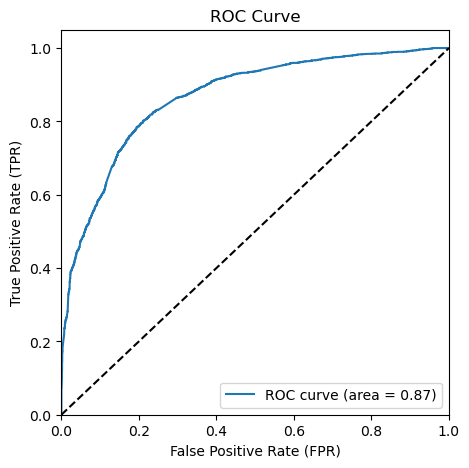

In [68]:
# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Pred_converted)
# Define a function to draw the ROC curve
def draw_roc_curve(actual, pred):
    fpr, tpr, thresholds = metrics.roc_curve(actual, pred, drop_intermediate=False)
    roc_auc = metrics.roc_auc_score(actual, pred)    
    # Create the ROC curve plot
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guess
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
# Call the function and display the ROC curve
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Pred_converted)

The ROC curve illustrates the trade-off between a binary classifier's true positive rate and false positive rate across varying classification thresholds, aiding performance evaluation.

From the ROC curve, the area under curve is 0.86 therfore our model is good.

**as we have taken cutoff value of 0.5 randomly and we need to determind the best cutoff value to get balanced secitivity and specificity.**

In [69]:
# Define a list of different probability cutoffs
var = [float(i)/10 for i in range(10)]
# Loop through the list of cutoffs
for i in var:
    # Create a new column for each cutoff indicating predictions based on that cutoff
    y_train_pred_final[i] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > i else 0) 
# Display the updated DataFrame
y_train_pred_final.head()

,Converted,Pred_converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.283349,0,1,1,1,0,0,0,0,0,0,0
1,0,0.076504,0,1,0,0,0,0,0,0,0,0,0
2,1,0.066742,0,1,0,0,0,0,0,0,0,0,0
3,1,0.361518,0,1,1,1,1,0,0,0,0,0,0
4,1,0.958545,1,1,1,1,1,1,1,1,1,1,1


In [70]:
# Create a new DataFrame to store evaluation metrics
new_df = pd.DataFrame(columns=['prob','accu','sensi','speci'])
# Define a list of different probability cutoffs
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# Loop through the list of cutoffs
for i in num:
    # Calculate confusion matrix for the current cutoff
    met = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    # Calculate total number of observations
    total1 = sum(sum(met))
    # Calculate accuracy
    accu = (met[0,0] + met[1,1]) / total1
    # Calculate specificity
    speci = met[0,0] / (met[0,0] + met[0,1])
    # Calculate sensitivity
    sensi = met[1,1] / (met[1,1] + met[1,0])
    # Store the evaluation metrics in the new DataFrame
    new_df.loc[i] = [i, accu, sensi, speci]
# Print the DataFrame with evaluation metrics
print(new_df)

     prob      accu     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.568258  0.985109  0.180796
0.2   0.2  0.707689  0.937180  0.494377
0.3   0.3  0.761040  0.894835  0.636678
0.4   0.4  0.793096  0.805956  0.781142
0.5   0.5  0.789061  0.738018  0.836505
0.6   0.6  0.761488  0.628664  0.884948
0.7   0.7  0.742659  0.552815  0.919118
0.8   0.8  0.712396  0.449977  0.956315
0.9   0.9  0.649630  0.290368  0.983564


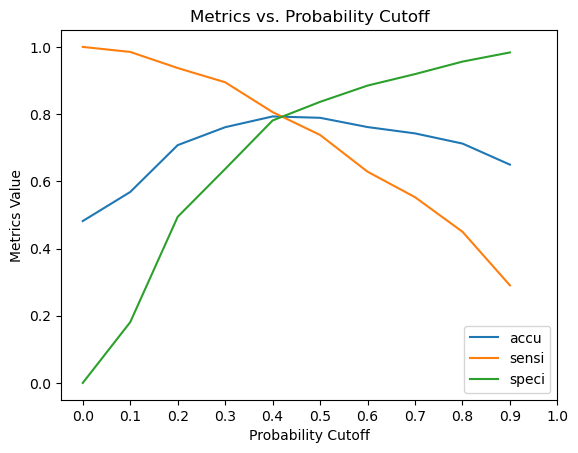

In [71]:
# Create a line plot
new_df.plot.line(x='prob', y=['accu', 'sensi', 'speci'])
# Add labels and title
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics Value')
plt.title('Metrics vs. Probability Cutoff')
# Set the scaling for x axis with desired tick marks
plt.xticks(np.arange(0, 1.1, 0.1))
# Display the plot
plt.show()

As you can see that around 0.43, you get the optimal values of the three metrics. So let's choose 0.43 as our cutoff now.

In [72]:
# Add a new column 'final_pred' based on a probability cutoff of 0.43
y_train_pred_final['final_pred'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > 0.43 else 0)
# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Pred_converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,0,0.283349,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.076504,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.066742,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.361518,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.958545,1,1,1,1,1,1,1,1,1,1,1,1


In this code:

- `y_train_pred_final['final_pred'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > 0.43 else 0)` creates a new       column `'final_pred'` in the DataFrame `y_train_pred_final`. It uses the `'Pred_converted'` column's values and maps them using a lambda function. If a value in the `'Pred_converted'` column is greater than 0.43, it assigns 1; otherwise, it assigns 0 to the corresponding row in the `'final_pred'` column.

- `y_train_pred_final.head()` is used to display the first few rows of the updated DataFrame, showing the new `'final_pred'` column along with other columns.

This code essentially applies the chosen probability cutoff (0.43) to the predicted probabilities to classify the observations into the positive or negative class based on the logistic regression model's predictions.

In [73]:
# Add a new column 'Lead_Score' based on rounded predicted probabilities
y_train_pred_final['Lead_Score'] = y_train_pred_final.Pred_converted.map(lambda x: round(x * 100))
# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Pred_converted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred,Lead_Score
0,0,0.283349,0,1,1,1,0,0,0,0,0,0,0,0,28
1,0,0.076504,0,1,0,0,0,0,0,0,0,0,0,0,8
2,1,0.066742,0,1,0,0,0,0,0,0,0,0,0,0,7
3,1,0.361518,0,1,1,1,1,0,0,0,0,0,0,0,36
4,1,0.958545,1,1,1,1,1,1,1,1,1,1,1,1,96


In this code:

- `y_train_pred_final['Lead_Score'] = y_train_pred_final.Pred_converted.map(lambda x: round(x * 100))` creates a new column `'Lead_Score'` in the DataFrame `y_train_pred_final`. It uses the `'Pred_converted'` column's values and maps them using a lambda function. The lambda function rounds each value to the nearest whole number and then multiplies it by 100 to convert the probability value into a lead score.

- `y_train_pred_final.head()` is used to display the first few rows of the updated DataFrame, showing the new `'Lead_Score'` column along with other columns.

This code is used to convert the predicted probabilities from the logistic regression model into lead scores that are more interpretable for decision-making.

In [74]:
#finding accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_pred)

0.7951132033176418

In [75]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_pred )
confusion2

array([[1859,  453],
       [ 461, 1688]], dtype=int64)

In [76]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [77]:
# Calculating the 'Sensitivity'
TP/(TP+FN)

0.7854816193578409

In [78]:
# Calculating the 'Specificity'
TN/(TN+FP)

0.8040657439446367

at the optimum cutoff value of 0.43 we got :
- **accuracy = 0.795**
- **Sensitivity = 0.785**
- **Specificity = 0.804**

# Precision-Recall

In [79]:
# Calculate the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
# Display the confusion matrix
confusion

array([[1934,  378],
       [ 563, 1586]], dtype=int64)

In [80]:
#finding Precision
TP / (TP + FP)

0.7884166277440449

In [81]:
#finding Recall
TP / (TP + FN)

0.7854816193578409

for this model we got
- **Precision = 0.788**
- **Recall = 0.785**

In [82]:
#Comparing the actual converted values (y_train_pred_final.Converted) with the predicted values (y_train_pred_final.predicted) 
#to assess the model's performance.

y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_converted.map(lambda x: 1 if x > 0.43 else 0)

# Access the 'Converted' and 'final_predicted' columns from y_train_pred_final
comparison = y_train_pred_final[['Converted', 'final_predicted']]
print(comparison)

      Converted  final_predicted
0             0                0
1             0                0
2             1                0
3             1                0
4             1                1
...         ...              ...
4456          1                1
4457          0                1
4458          0                1
4459          0                0
4460          0                0

[4461 rows x 2 columns]


In [83]:
# Calculate precision, recall, and thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Pred_converted)

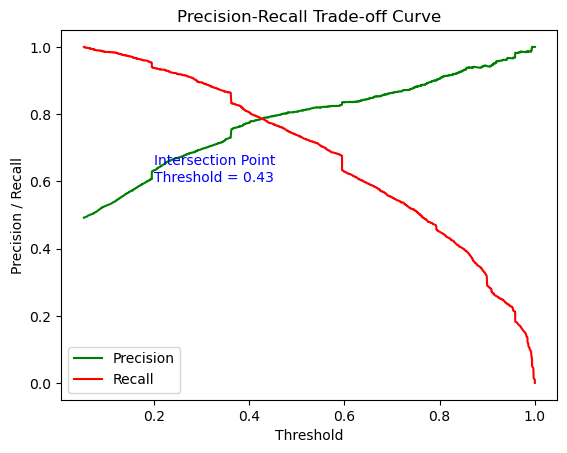

In [84]:
# Plotting the trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Trade-off Curve")
plt.legend()
# Annotate the point where the curves intersect
intersection_point = thresholds[np.argmax(p >= r)]
plt.annotate(f'Intersection Point\nThreshold = {intersection_point:.2f}', 
             xy=(intersection_point, max(p[:-1])), 
             xytext=(0.2, 0.6),  # Adjust xytext to position the annotation higher
             fontsize=10,       # Adjust font size for better visibility
             color='blue')      # Adjust text color
plt.show()

The graph presented above illustrates the trade-off relationship between Precision and Recall.

## ________________________9. **Model Evaluation Using Test Set:**______________________________________________
   - **Appropriate Evaluation Metrics:**

# Making Predictions on the Test Set

In [85]:
# Use MinMaxScaler to scale specific columns in x_test
x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [86]:
# Selecting the same 15 columns from x_train in x_test
x_test = x_test[selectedfeatures]
x_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Approached upfront,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4771,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
6122,0.027888,0.029049,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,0.015936,0.416813,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6570,0.011952,0.378961,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2668,0.031873,0.395246,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [87]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(x_test[selectedfeatures])

In [88]:
# Dropping columns from X_test_sm
X_test_sm.drop(['Last Notable Activity_Unreachable', 'Last Notable Activity_Had a Phone Conversation', 'What is your current occupation_Housewife', 'Last Activity_Had a Phone Conversation', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'What is your current occupation_Student'], axis=1, inplace=True)

In [89]:
X_test_sm.shape

(1912, 14)

In [90]:
# Predicting probabilities on the test set using the trained model
y_test_pred = res.predict(sm.add_constant(x_test))
print(y_test_pred[:10])

4771    0.996927
6122    0.143776
9202    0.689364
6570    0.644567
2668    0.497655
4233    0.953768
3368    0.806035
9091    0.491076
5972    0.137948
3631    0.773197
dtype: float64


In [91]:
# Convert the predicted probabilities into a pandas DataFrame
y_test_pred = pd.DataFrame(y_test_pred)
# Display the DataFrame containing the predicted probabilities
y_test_pred

,0
4771,0.996927
6122,0.143776
9202,0.689364
6570,0.644567
2668,0.497655
...,...
5828,0.140059
6583,0.397879
5531,0.809424
3056,0.756222


In [92]:
# Convert y_test to a pandas DataFrame
y_test = pd.DataFrame(y_test)

In [93]:
# Add a new column 'Prospect ID' to y_test DataFrame using the index values
y_test['Prospect ID'] = y_test.index
y_test.head()

,Converted,Prospect ID
4771,1,4771
6122,0,6122
9202,0,9202
6570,1,6570
2668,1,2668


In [94]:
# Reset the index of y_test_pred DataFrame and drop the old index column
y_test_pred.reset_index(drop=True, inplace=True)
# Reset the index of y_test DataFrame and drop the old index column
y_test.reset_index(drop=True, inplace=True)

In [95]:
# Concatenate y_test and y_test_pred DataFrames horizontally
y_test_pred_final = pd.concat([y_test, y_test_pred], axis=1)
# Display the first few rows of the concatenated DataFrame
y_test_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.996927
1,0,6122,0.143776
2,0,9202,0.689364
3,1,6570,0.644567
4,1,2668,0.497655


In [96]:
# Renaming the column '0' to 'Pred_converted' in the y_test_pred_final DataFrame
y_test_pred_final = y_test_pred_final.rename(columns={0: 'Pred_converted'})
# Display the first few rows of the updated DataFrame
y_test_pred_final.head()

,Converted,Prospect ID,Pred_converted
0,1,4771,0.996927
1,0,6122,0.143776
2,0,9202,0.689364
3,1,6570,0.644567
4,1,2668,0.497655


In [97]:
# Reordering columns in y_test_pred_final DataFrame
y_test_pred_final = y_test_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Pred_converted'])
# Display the first few rows of the updated DataFrame
y_test_pred_final.head()

,Prospect ID,Converted,Pred_converted
0,4771,1,0.996927
1,6122,0,0.143776
2,9202,0,0.689364
3,6570,1,0.644567
4,2668,1,0.497655


In [116]:
# Applying a custom threshold to predict final conversion
y_test_pred_final['final_predicted'] = y_test_pred_final.Pred_converted.map(lambda x: 1 if x > 0.42 else 0)
# Display the first few rows of the DataFrame with the new 'final_predicted' column
y_test_pred_final.head()

,Prospect ID,Converted,Pred_converted,final_predicted,Lead_Score
0,4771,1,0.996927,1,100
1,6122,0,0.143776,0,14
2,9202,0,0.689364,1,69
3,6570,1,0.644567,1,64
4,2668,1,0.497655,1,50


In [99]:
# Calculate the accuracy score for the final predictions on the test dataset
accuracy = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)
# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.7928870292887029


In [100]:
# Calculate the confusion matrix for the final predictions on the test dataset
confusion2 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion2)

Confusion Matrix:
[[805 191]
 [205 711]]


In [101]:
# Calculate TP, TN, FP, and FN from the confusion matrix
# Extract values for True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = confusion2[1, 1]  # True Positives: correctly predicted positive instances
TN = confusion2[0, 0]  # True Negatives: correctly predicted negative instances
FP = confusion2[0, 1]  # False Positives: negative instances predicted as positive
FN = confusion2[1, 0]  # False Negatives: positive instances predicted as negative
# Print the values of TP, TN, FP, and FN
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 711
True Negatives: 805
False Positives: 191
False Negatives: 205


In [102]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7762008733624454

In [103]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.8082329317269076

In [104]:
# Create a new column 'Lead_Score' in the DataFrame by mapping the predicted probabilities to rounded scores
y_test_pred_final['Lead_Score'] = y_test_pred_final.Pred_converted.map(lambda x: round(x * 100))
# Display the first few rows of the DataFrame with the new 'Lead_Score' column
y_test_pred_final.head()

,Prospect ID,Converted,Pred_converted,final_predicted,Lead_Score
0,4771,1,0.996927,1,100
1,6122,0,0.143776,0,14
2,9202,0,0.689364,1,69
3,6570,1,0.644567,1,64
4,2668,1,0.497655,1,50


for Test set we got the metrics as :
- **Accuracy = 0.792**
- **Sensitivity = 0.776**
- **Specificity = 0.808**

In [109]:
# Calculate the confusion matrix for the test set predictions
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
# Display the confusion matrix
print(confusion)

[[805 191]
 [205 711]]


In [110]:
#finding Precision
TP / (TP + FP)

0.7882483370288248

In [111]:
#finding Recall
TP / (TP + FN)

0.7762008733624454

for this model we got
- **Precision = 0.788**
- **Recall = 0.776**

In [115]:
#Comparing the actual converted values (y_train_pred_final.Converted) with the predicted values (y_train_pred_final.predicted) 
#to assess the model's performance.

y_test_pred_final['final_predicted'] = y_test_pred_final.Pred_converted.map(lambda x: 1 if x > 0.42 else 0)

# Access the 'Converted' and 'final_predicted' columns from y_train_pred_final
comparison = y_test_pred_final[['Converted', 'final_predicted']]
print(comparison)

      Converted  final_predicted
0             1                1
1             0                0
2             0                1
3             1                1
4             1                1
...         ...              ...
1907          0                0
1908          1                0
1909          0                1
1910          1                1
1911          1                1

[1912 rows x 2 columns]


In [113]:
# Calculate precision, recall, and thresholds
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Pred_converted)

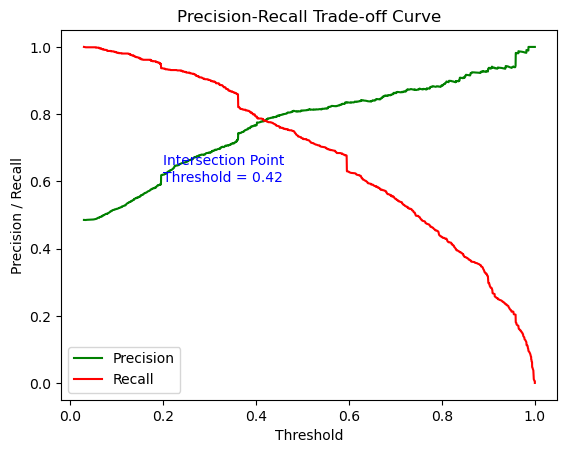

In [114]:
# Plotting the trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall Trade-off Curve")
plt.legend()
# Annotate the point where the curves intersect
intersection_point = thresholds[np.argmax(p >= r)]
plt.annotate(f'Intersection Point\nThreshold = {intersection_point:.2f}', 
             xy=(intersection_point, max(p[:-1])), 
             xytext=(0.2, 0.6),  # Adjust xytext to position the annotation higher
             fontsize=10,       # Adjust font size for better visibility
             color='blue')      # Adjust text color
plt.show()

The graph presented above illustrates the trade-off relationship between Precision and Recall.

## Results

Comparing metrics for both Train and Test sets. 

for Train set we got the metrics as :
- **Accuracy = 0.795**
- **Sensitivity = 0.785**
- **Specificity = 0.804**

for Test set we got the metrics as :
- **Accuracy = 0.792**
- **Sensitivity = 0.776**
- **Specificity = 0.808**

After comparing the evaluation metrics of the test and train datasets, we observe that they exhibit similar values. This suggests that our model is performing well and is consistent across different data subsets.

**The achived target lead converstion rate from the model is almost 80%.**

Identifying Prospective Leads for Contact:

Customers with a "Lead Score" of 85 or higher should be contacted; these individuals can be classified as 'Hot Leads'.

In [105]:
# Filter out the hot leads from the test predictions dataframe
hot_leads = y_test_pred_final.loc[y_test_pred_final["Lead_Score"] >= 85]
# Display the hot leads
hot_leads

,Prospect ID,Converted,Pred_converted,final_predicted,Lead_Score
0,4771,1,0.996927,1,100
5,4233,1,0.953768,1,95
10,6884,1,0.992058,1,99
14,4198,1,0.903003,1,90
17,1899,1,0.930522,1,93
...,...,...,...,...,...
1889,533,1,0.901968,1,90
1894,4982,1,0.857532,1,86
1904,8801,1,0.914149,1,91
1905,1558,1,0.960612,1,96


A total of 388 leads are potential candidates for contact, with a significant probability of conversion.

prospect IDs of customers to be contacted are:

In [106]:
#listing out the prospect ids of the customers.
target_list= hot_leads['Prospect ID'].values

In [107]:
target_list

array([4771, 4233, 6884, 4198, 1899, 2010, 8205, 1965, 1552, 7766, 2914,
       8174, 6175, 9162, 8641, 2131,  889, 6499, 2860, 4559, 5769, 3097,
       5644, 4753, 3265, 3837, 8065,   98, 4940, 8901, 2339, 1365, 8452,
       4250,  810, 2943, 5783, 7042, 2490, 1171, 4081, 8111, 5822, 4230,
       4614, 1859, 5576, 7228, 4540, 5524, 6999,  373, 1614, 7082, 2592,
       5197, 4548, 6480, 4772, 7265,  892, 4065, 7853, 2384,  449, 8492,
       1563, 5414,  319, 2014, 5815, 1165, 7040,  918, 7496, 8027, 6913,
       8183, 5795, 2497, 7959, 7089, 4776, 1068, 3491,   64, 4061, 2982,
       8568, 8576, 5541, 2960, 2614, 7096, 5300, 1926, 6792, 4592, 6422,
        446, 4892, 6773, 4775, 8043, 2677, 7905,  264, 3069, 3845, 4179,
       5706, 2617, 4461, 3817, 5671, 6737, 5915, 1387, 2622, 9043, 3983,
       7166, 3488, 5804, 6771,  213, 6252, 6126, 6755, 3147, 7482, 8594,
       7334, 4197, 6736, 6156, 7053, 4856, 3001, 4941, 2411, 1112, 4338,
       6290, 7417, 1263, 1458, 8062, 8942, 2495, 84

**Recommendations:**

1. **Target High-Conversion Sources:** Focus on leads originating from "Welingak Website" and "Reference" sources, as they have a higher likelihood of conversion.

2. **Prioritize Working Professionals:** Prioritize leads who are working professionals, as they show a higher tendency to convert into customers.

3. **Engage High-Engagement Visitors:** Reach out to leads who spent more time on the website, as their engagement suggests a higher chance of conversion.

4. **Tap into Chat Leads:** Give special attention to leads from the "Olark Chat" source, as they exhibit a higher probability of conversion.

5. **Leverage SMS-Sent Activity:** Reach out to leads whose last activity was marked as "SMS Sent," as this activity indicates a better chance of conversion.

6. **Avoid Olark Chat Conversations:** Consider not contacting leads whose last activity was "Olark Chat Conversation," as these interactions are less likely to result in conversion.

7. **Assess Lead Origin:** Be cautious with leads from "Landing Page Submission" as they tend to have lower conversion rates.

8. **Specialization Matters:** Be selective with leads whose specialization is labeled as "Others," as they demonstrate a lower likelihood of conversion.

9. **Avoid "Do Not Email" Leads:** Minimize outreach to leads who have opted for "Do Not Email" since they are less likely to convert.

These recommendations are based on the analysis of the model and can assist in optimizing lead engagement strategies for higher conversion rates.